**Table of contents**<a id='toc0_'></a>    
- [Scikit Learn](#toc1_)    
- [Scikit Learn을 이용한 Decision Tree 구현](#toc2_)    
  - [지도학습](#toc2_1_)    
  - [Decision Tree 시각화(plot_tree)](#toc2_2_)    
  - [Decision Tree에 따른 Decision 영역 시각화](#toc2_3_)    
- [과적합 방지하는 방법 - 데이터 분리](#toc3_)    
- [Train 데이터로만 지도학습/Decision Tree 구현](#toc4_)    
  - [max_depth 설정](#toc4_1_)    
  - [Train 데이터에 대한 모델 검증](#toc4_2_)    
    - [Accuracy Score](#toc4_2_1_)    
    - [Decision Tree 시각화(plot_tree)](#toc4_2_2_)    
    - [Decision 영역 시각화(plot_decision_regions)](#toc4_2_3_)    
  - [Test 데이터에 대한 모델 검증](#toc4_3_)    
    - [Accuracy Score](#toc4_3_1_)    
  - [전체 데이터 중 Train 데이터, Test 데이터 비율 시각화](#toc4_4_)    
- [전체 features 를 이용한 지도 학습](#toc5_)    
- [임의 데이터로 모델 검증](#toc6_)    
  - [모델의 답이 맞을 확률](#toc6_1_)    
  - [features의 중요도(feature_importances_)](#toc6_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Scikit Learn](#toc0_)

- 2007년 구글 썸머 코드에서 처음 구현
- 현재 파이썬에서 가장 유명한 기계 학습 오픈 소스 라이브러리

In [1]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# <a id='toc2_'></a>[Scikit Learn을 이용한 Decision Tree 구현](#toc0_)

## <a id='toc2_1_'></a>[지도학습](#toc0_)
- 학습 대상이 되는 데이터에 정답(label)을 붙여서 학습시키고
- 모델을 얻어서 완전히 새로운 데이터에 모델을 사용해서 "답"을 얻고자 하는 것

In [3]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier()
iris_tree.fit(iris.data[:, 2:], iris.target)

DecisionTreeClassifier()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

## <a id='toc2_2_'></a>[Decision Tree 시각화(plot_tree)](#toc0_)

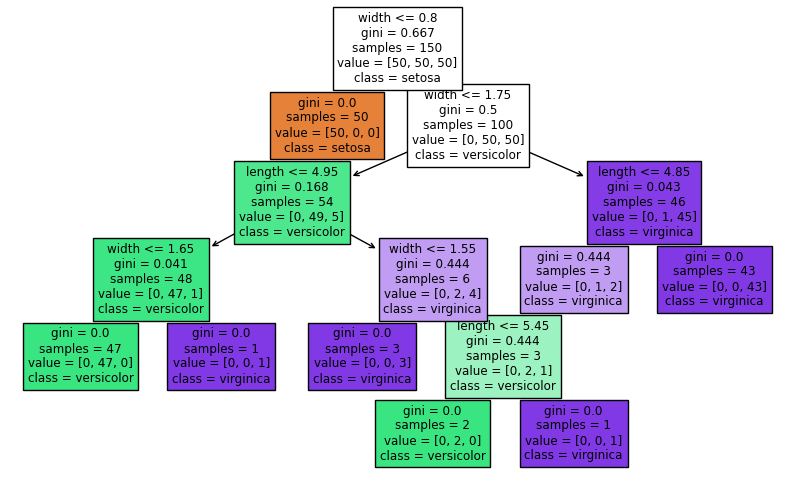

In [ ]:
fig=plt.figure(figsize=(10, 6))
_=tree.plot_tree(iris_tree, feature_names=['length', 'width'],
                class_names=list(iris.target_names), # setosa, versicolor, virginica
                filled=True
                )

## <a id='toc2_3_'></a>[Decision Tree에 따른 Decision 영역 시각화](#toc0_)

In [10]:
#!pip install mlxtend

In [11]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

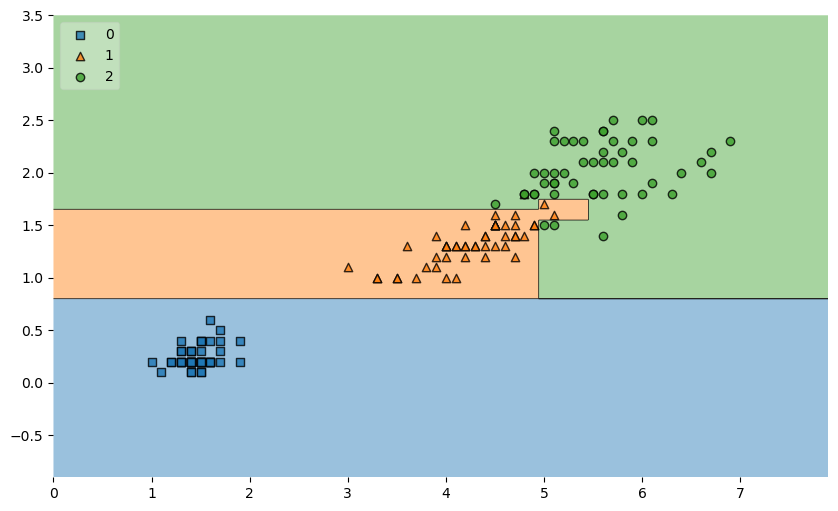

In [14]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X=iris.data[:, 2:], y=iris.target,
                    clf=iris_tree, legend=2)

너무 섬세하게 경계가 나뉘어져 있는데.. 과적합일수도..?

# <a id='toc3_'></a>[과적합 방지하는 방법 - 데이터 분리](#toc0_)
- 데이터의 분리
    - 훈련(training)
    - 검증(validation)
    - 테스트(testing)


In [15]:
from sklearn.model_selection import train_test_split

In [17]:
features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2,
                                                    random_state=13)

- label에서 0, 1, 2의 비율에서 차이가 남 <br>
-> 데이터 분리가 잘못됨

In [19]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13]))

- `stratify`를 사용하면 비율이 똑같게(비슷하게) 분리가 됨

In [20]:
features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13)

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

# <a id='toc4_'></a>[Train 데이터로만 지도학습/Decision Tree 구현](#toc0_)

## <a id='toc4_1_'></a>[max_depth 설정](#toc0_)
- max_depth는 얼마나 트리를 세분화할지 정함
- 너무 깊으면 과적합이 될수도

In [ ]:
iris_tree=DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

## <a id='toc4_2_'></a>[Train 데이터에 대한 모델 검증](#toc0_)

### <a id='toc4_2_1_'></a>[Accuracy Score](#toc0_)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

### <a id='toc4_2_2_'></a>[Decision Tree 시각화(plot_tree)](#toc0_)

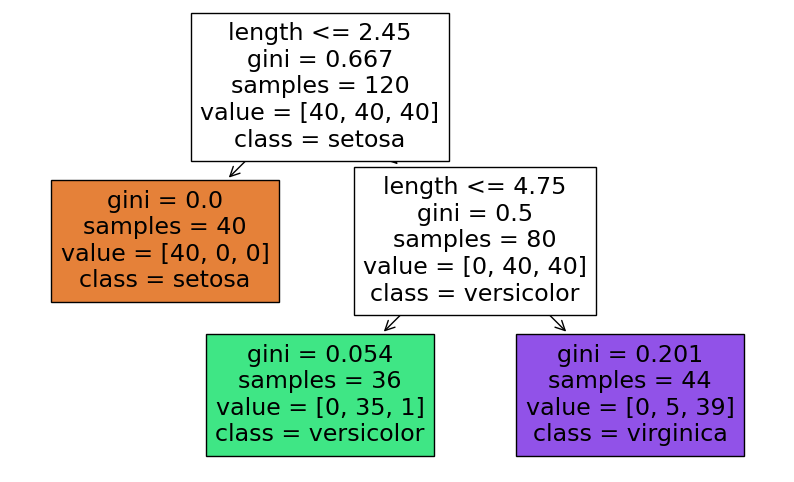

In [ ]:
fig=plt.figure(figsize=(10, 6))
_=tree.plot_tree(iris_tree, feature_names=['length', 'width'],
                class_names=list(iris.target_names),
                filled=True)

### <a id='toc4_2_3_'></a>[Decision 영역 시각화(plot_decision_regions)](#toc0_)

<Axes: >

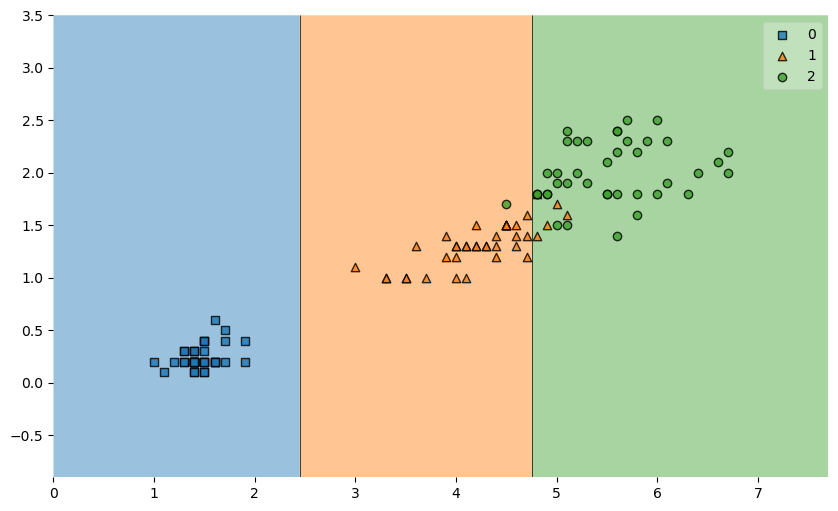

In [ ]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_train, y=y_train, 
                    clf=iris_tree)

## <a id='toc4_3_'></a>[Test 데이터에 대한 모델 검증](#toc0_)

### <a id='toc4_3_1_'></a>[Accuracy Score](#toc0_)

In [ ]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

## <a id='toc4_4_'></a>[전체 데이터 중 Train 데이터, Test 데이터 비율 시각화](#toc0_)

<Axes: >

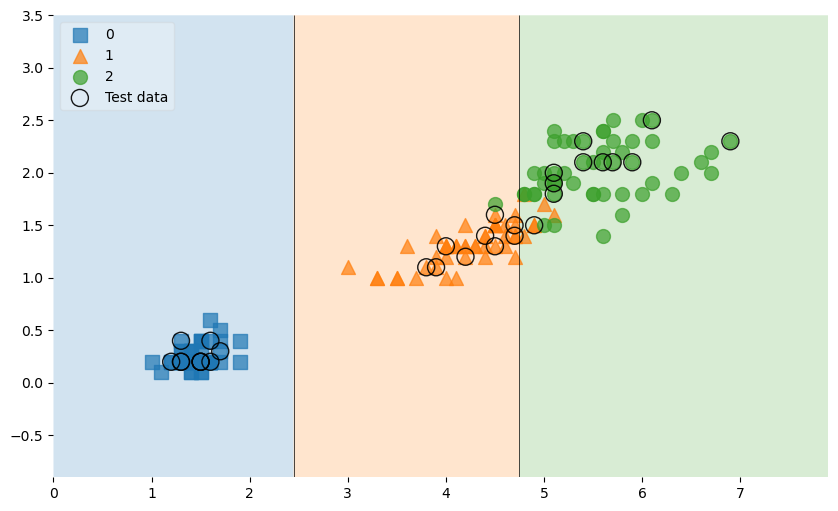

In [ ]:
scatter_highlight_kwargs = {
    's': 150, 
    'label': 'Test data',
    'alpha': 0.9
}
scatter_kwargs = {
    's': 100, 
    'edgecolor': None,
    'alpha': 0.7
}

plt.figure(figsize=(10, 6))
plot_decision_regions(X=features, y=labels, 
                    X_highlight=X_test, clf=iris_tree,
                    legend=2, scatter_highlight_kwargs=scatter_highlight_kwargs,
                    scatter_kwargs=scatter_kwargs,
                    contourf_kwargs={'alpha':0.2})

# <a id='toc5_'></a>[전체 features 를 이용한 지도 학습](#toc0_)

In [31]:
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, 
    stratify=labels, random_state=13
)

In [39]:
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

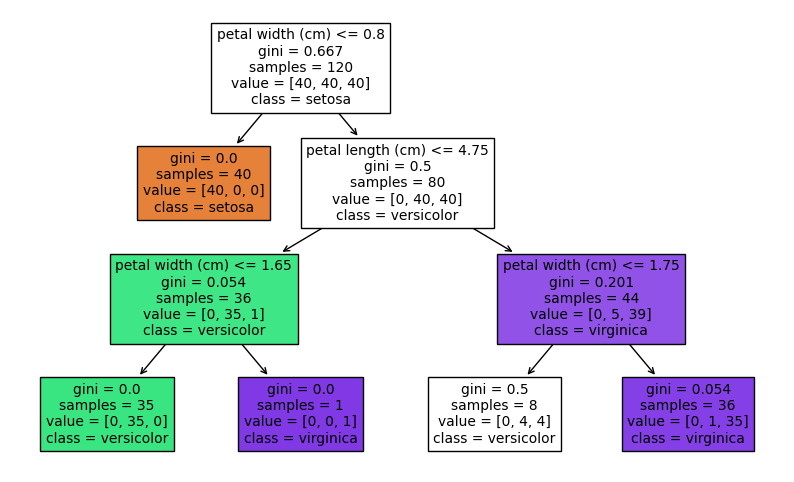

In [ ]:
fig=plt.figure(figsize=(10, 6))
_=tree.plot_tree(iris_tree, feature_names=list(iris.feature_names),
                class_names=list(iris.target_names), # setosa, versicolor, virginica
                filled=True
                )

# <a id='toc6_'></a>[임의 데이터로 모델 검증](#toc0_)

In [ ]:
test_data = [[4.3, 2., 1.2, 1.0]]
iris_tree.predict(test_data)

array([1])

## <a id='toc6_1_'></a>[모델의 답이 맞을 확률](#toc0_)

In [41]:
iris_tree.predict_proba(test_data)

array([[0.        , 0.97222222, 0.02777778]])

In [ ]:
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

## <a id='toc6_2_'></a>[features의 중요도(feature_importances_)](#toc0_)

In [45]:
iris_tree.feature_importances_, iris.feature_names

(array([0.        , 0.        , 0.42189781, 0.57810219]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [46]:
dict(zip(iris.feature_names, iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}